In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset = pd.read_csv(r"E:\Data Science Post Class\Machine Learning\Classification\Decision Tree\Decision Tree Classifier\car_evaluation.csv")

In [4]:
dataset.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [5]:
del dataset

In [6]:
data = 'E:\Data Science Post Class\Machine Learning\Classification\Decision Tree\Decision Tree Classifier\car_evaluation.csv'

In [7]:
df = pd.read_csv(data, header=None)

In [8]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


# Exploratory Data Analysis

In [9]:
df.shape

(1728, 7)

In [10]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


In [11]:
df.columns = col_names

In [12]:
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [13]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [15]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


for col in col_names:
    
    print(df[col].value_counts()) 

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
2       576
4       576
more    576
Name: persons, dtype: int64
small    576
med      576
big      576
Name: lug_boot, dtype: int64
low     576
med     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [16]:
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [17]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [18]:
X = df.drop(['class'], axis=1)

In [19]:
y = df['class']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33, random_state=0)

In [22]:
X_train.shape

(1157, 6)

In [23]:
y_train.shape

(1157,)

In [24]:
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [25]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1261,med,low,4,more,small,med
1727,low,low,5more,more,big,high
548,high,high,2,2,big,high
1507,low,high,5more,more,med,med
494,high,vhigh,4,2,big,high


In [26]:
import category_encoders as ce

In [27]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [28]:
encoder = ce.OrdinalEncoder(cols =['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

In [29]:
X_train = encoder.fit_transform(X_train)

In [30]:
X_test = encoder.fit_transform(X_test)

In [31]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1261,1,1,1,1,1,1
1727,2,1,2,1,2,2
548,3,2,3,2,2,2
1507,2,2,2,1,3,1
494,3,3,1,2,2,2


In [32]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
1318,1,1,1,1,1,1
124,2,2,1,2,2,1
648,3,3,1,3,3,2
249,2,3,2,3,2,2
1599,1,3,3,3,2,2


In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
clf_gini = DecisionTreeClassifier(criterion ='gini', max_depth = 3, random_state=0)

In [35]:
clf_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [36]:
y_pred_gini = clf_gini.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
print('Model accuracy score with creterion gini index : {0:0.4f}'.format(accuracy_score(y_test,y_pred_gini)))

Model accuracy score with creterion gini index : 0.5079


In [39]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['acc', 'acc', 'unacc', ..., 'unacc', 'acc', 'unacc'], dtype=object)

In [40]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7848


In [41]:
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7848
Test set score: 0.5079


[Text(0.625, 0.875, 'X[5] <= 2.5\ngini = 0.456\nsamples = 1157\nvalue = [258, 42, 811, 46]'),
 Text(0.5, 0.625, 'X[3] <= 2.5\ngini = 0.58\nsamples = 765\nvalue = [258, 42, 419, 46]'),
 Text(0.25, 0.375, 'X[3] <= 1.5\ngini = 0.495\nsamples = 509\nvalue = [124, 22, 338, 25]'),
 Text(0.125, 0.125, 'gini = 0.638\nsamples = 255\nvalue = [124, 22, 84, 25]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 254\nvalue = [0, 0, 254, 0]'),
 Text(0.75, 0.375, 'X[0] <= 2.5\ngini = 0.613\nsamples = 256\nvalue = [134, 20, 81, 21]'),
 Text(0.625, 0.125, 'gini = 0.614\nsamples = 122\nvalue = [69, 20, 12, 21]'),
 Text(0.875, 0.125, 'gini = 0.5\nsamples = 134\nvalue = [65, 0, 69, 0]'),
 Text(0.75, 0.625, 'gini = 0.0\nsamples = 392\nvalue = [0, 0, 392, 0]')]

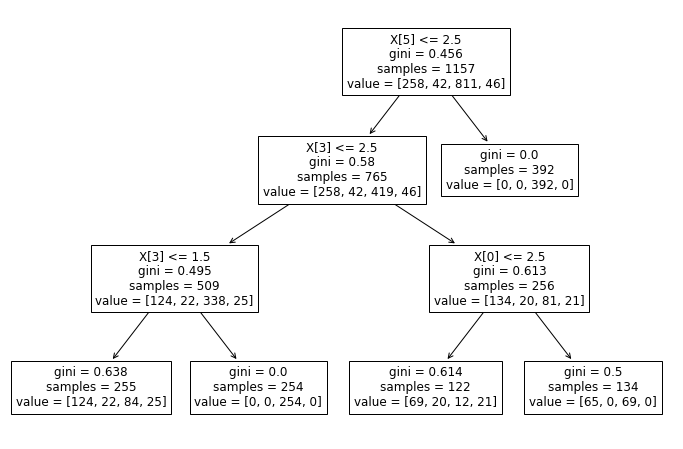

In [42]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_gini.fit(X_train,y_train))

In [43]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [44]:
y_pred_en = clf_en.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.5972


In [46]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'unacc', 'unacc'],
      dtype=object)

In [47]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.7502


In [48]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.7502
Test set score: 0.5972


[Text(0.625, 0.875, 'X[5] <= 2.5\nentropy = 1.201\nsamples = 1157\nvalue = [258, 42, 811, 46]'),
 Text(0.5, 0.625, 'X[0] <= 2.5\nentropy = 1.478\nsamples = 765\nvalue = [258, 42, 419, 46]'),
 Text(0.25, 0.375, 'X[3] <= 2.5\nentropy = 1.779\nsamples = 374\nvalue = [126, 42, 160, 46]'),
 Text(0.125, 0.125, 'entropy = 1.574\nsamples = 252\nvalue = [57, 22, 148, 25]'),
 Text(0.375, 0.125, 'entropy = 1.659\nsamples = 122\nvalue = [69, 20, 12, 21]'),
 Text(0.75, 0.375, 'X[4] <= 1.5\nentropy = 0.922\nsamples = 391\nvalue = [132, 0, 259, 0]'),
 Text(0.625, 0.125, 'entropy = 0.644\nsamples = 128\nvalue = [21, 0, 107, 0]'),
 Text(0.875, 0.125, 'entropy = 0.982\nsamples = 263\nvalue = [111, 0, 152, 0]'),
 Text(0.75, 0.625, 'entropy = 0.0\nsamples = 392\nvalue = [0, 0, 392, 0]')]

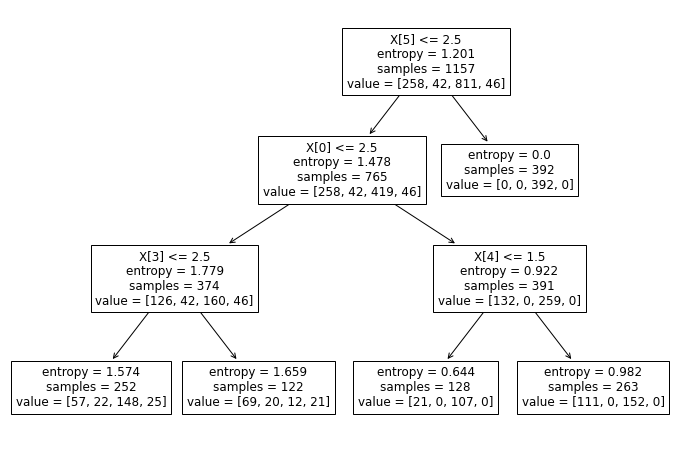

In [49]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train)) 

In [51]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[  0   0 126   0]
 [  0   0  27   0]
 [ 58   0 341   0]
 [  0   0  19   0]]


In [52]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

         acc       0.00      0.00      0.00       126
        good       0.00      0.00      0.00        27
       unacc       0.66      0.85      0.75       399
       vgood       0.00      0.00      0.00        19

    accuracy                           0.60       571
   macro avg       0.17      0.21      0.19       571
weighted avg       0.46      0.60      0.52       571



**End**